
# **Capacitated Vehicle Routing Problem (CVRP)**
Il Vehicle Routing Problem (VRP) ha lo scopo di determinare il miglior insieme di percorsi che devono essere eseguiti da una flotta di $k$ veicoli per servire un determinato insieme di clienti. Il **Capacitated Vehicle Routing Problem (CVRP)** è una delle varianti più comuni, in quanto introduce veicoli con *capacità di carico $Q$ limitata*.

Il problema è rappresentato tramite un Grafo orientato $G(V,A)$ con
- $V = \begin{Bmatrix}v_1,v_2,...v_n\end{Bmatrix}$ insieme dei nodi
- $A$ insieme degli archi

$v_1$ è detto *nodo deposito*, mentre $\begin{Bmatrix}v_2,...v_n\end{Bmatrix}$ sono i *nodi clienti*.

il costo $c_{ij}$, definito per ciascun arco $(i,j)\in A$, rappresenta il costo del viaggio lungo l'arco.
Ogni destinazione $v_i (i\ne 1)$ è caratterizzata da una domanda indicata con $d_i \ge 0$.








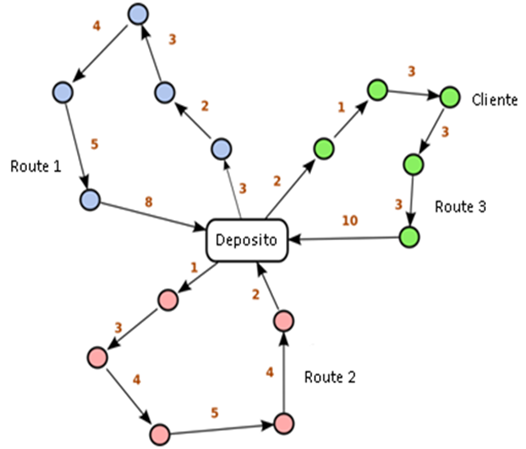

## **Formulazione a due indici (veicoli omogenei)**


---


### **Variabili decisionali**

- $x_{ij}$ variabile decisionale associata agli archi

     - 1 se l'arco $(i,j) \in A$ viene attraversato da un veicolo

     - 0 altrimenti

- $u_i$ quantità di domanda servita dal veicolo nel percorso dal deposito al nodo i



---


### **Funzione obiettivo**

\begin{align}
\min \quad \sum_{i=1}^n\sum_{j=1}^n c_{ij} \cdot x_{ij} && \text{Minimizzare i costi totali di trasporto}
\end{align}



---


### **Vincoli**

$$\begin{align}
\quad & \sum_{j=1}^n x_{ij} = \sum_{j=1}^n x_{ji}  \quad\quad i \in \begin{Bmatrix}1,2,...,n\end{Bmatrix}&&\text{Se un veicolo entra in un nodo deve anche uscirne} \\
& \sum_{j=2}^n x_{1j} = k &&\text{Dal deposito devono uscire k veicoli} \\
& \sum_{j=1}^n x_{ij} = 1 \quad \quad i\in  \begin{Bmatrix}2,...,n\end{Bmatrix}, \ i\ne j&&\text{Ogni cliente deve essere servito da un unico camion} \\
& u_1 = 0 &&\text{Quando il camion parte dal deposito non ha ancora servito alcuna domanda} \\\\
& u_i \le Q \quad\quad i \in V &&\text{Quando il camion arriva al cliente i, la domanda totale servita deve essere minore della sua capacità} \\\\
& u_j -u_i\ge d_jx_{ij}-Q(1-x_{ij})\quad \quad i,j\in V, i\ne j, j\ne 1  &&\text{Vincoli sulla capacità dei veicoli} \\\\
& x _{ij}= \begin{Bmatrix}0,1\end{Bmatrix}\quad \quad i,j \in \begin{Bmatrix}1,2,...,n\end{Bmatrix}
\end{align}$$


---



### Lettura dati da file

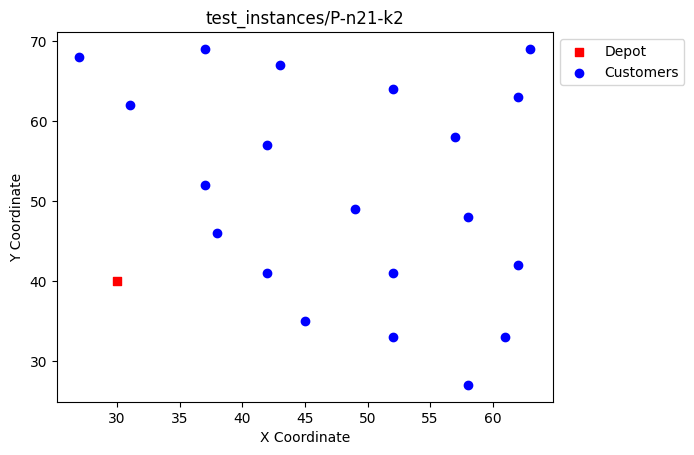

In [5]:
import numpy as np

#filename = "test_instances/P-n16-k8" #esempio 1
filename = "test_instances/P-n21-k2" #esempio 2
#filename = "test_instances/A-n32-k5" #esempio 3

#Lettura soluzione

file_sol = open(filename + ".sol", "r")
line_sol = file_sol.readlines()

rowInd = 0

while not line_sol[rowInd].startswith("Cost"):
        rowInd =  rowInd + 1

solution_cost = int(line_sol[rowInd].split()[1])

#Lettura istanza

file = open(filename + ".vrp", "r")
line = file.readlines()

k = int(filename[-1])
#k = int(np.ceil(sum(demands) / Q)) #se k non fornito

coordinates = {}

demands = {}

rowInd = 0
while not line[rowInd].startswith("EOF"):
    if line[rowInd].startswith("DIMENSION") :
        n = int(line[rowInd].split()[2])
        rowInd =  rowInd + 1
    elif line[rowInd].startswith("CAPACITY") :
        Q = int(line[rowInd].split()[2])
        rowInd =  rowInd + 1
    elif line[rowInd].startswith("NODE_COORD_SECTION") :
        rowInd =  rowInd + 1
        for i in range(n):
            coordinates[int(line[rowInd].split()[0]) - 1] = (int(line[rowInd].split()[1]), int(line[rowInd].split()[2]))
            rowInd = rowInd + 1
    elif line[rowInd].startswith("DEMAND_SECTION") :
        rowInd =  rowInd + 1
        for i in range(n):
            demands[int(line[rowInd].split()[0]) - 1] = (int(line[rowInd].split()[1]))
            rowInd = rowInd + 1
    else:
        rowInd =  rowInd + 1

distance_matrix = {}

for i in range(n):
    for j in range(n):
        if i != j:
            # Calcola la distanza euclidea tra i punti i e j
            dist = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 +
                           (coordinates[i][1] - coordinates[j][1])**2)
            # Assegna la distanza alla matrice delle distanze
            distance_matrix[i, j] = dist
            
#plot dell'instaza
import matplotlib.pyplot as plt
plt.scatter(coordinates[0][0], coordinates[0][1], c='r', marker='s', label='Depot')
for i in range(1,n):
    if i == 1:  # Specifica l'etichetta solo per il primo punto
     plt.scatter(coordinates[i][0], coordinates[i][1], c='b', label='Customers')
    else:
        plt.scatter(coordinates[i][0], coordinates[i][1], c='b')

    plt.title(filename)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    # Aggiungere la legenda fuori dalla figura
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Funzioni per la stampa dei risultati

In [8]:
import matplotlib.pyplot as plt
import time

def plot_routes(routes, coordinates):

    plt.figure(figsize=(10, 8))

    i=1
    # Disegna ogni rotta

    for route in routes.values():

        x_coords = [coordinates[node][0] for node in route]
        y_coords = [coordinates[node][1] for node in route]

        plt.plot(x_coords, y_coords, marker='o', label='Route'+str(i))
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        i=i+1

    plt.plot(coordinates[0][0], coordinates[0][1], c='r', marker='s', markersize=7)
    plt.scatter(coordinates[0][0], coordinates[0][1], c='r', marker='s', label='Depot')
    '''
    # Disegna i nodi
    for idx, (x, y) in enumerate(coordinates.values()):
        if idx == 0:
                plt.scatter(coordinates[0][0], coordinates[0][1], c='r', marker='s', label='Depot')
        else:
            plt.scatter(x, y, c='red')
            plt.text(x, y, f'{idx}', fontsize=12, ha='right')
    '''
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routes')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    #plt.grid()
    plt.show()

def print_results(routes, coordinates):

    time = end - start
    cost = 0
    cost_p = 0
    demand_p = 0
    print("\n")
    print("="*50+"\033[1m Routes \033[0m"+"="*50)
    print("\n")
    j=1
    for elem in routes:
        #print("\n")
        print(f"Route {j}: \t{routes[elem]}")
        #print(routes[elem])
        #print(sum(demands[node] for node in routes[elem]))
        j = j+1
        route = routes[elem]
        for i in range(len(route)-1):
            cost = cost + distance_matrix[route[i],route[i+1]]
            cost_p = cost_p + distance_matrix[route[i],route[i+1]]
            demand_p = demand_p + demands[route[i]]
        print(f"Cost: \t\t{cost_p:.2f}")
        print(f"Demand: \t{demand_p}\n")
        cost_p = 0
        demand_p = 0

    gap = (abs(cost-solution_cost)/solution_cost)*100
    print("="*120)
    print(f"\033[1m\nTotal Cost: \t{cost:.2f}\033[0m")
    print(f"\033[1mTotal Time: \t{time:.2f}\033[0m")

    plot_routes(routes, coordinates)

### Calcolo Soluzione ottima (vincoli MTZ)


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2697357
Academic license 2697357 - for non-commercial use only - registered to vi___@studenti.unina.it
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  30

Academic license 2697357 - for non-commercial use only - registered to vi___@studenti.unina.it
Optimize a model with 464 rows, 462 columns and 2482 nonzeros
Model fingerprint: 0x98697936
Variable types: 21 continuous, 441 integer (441 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [6e+00, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 22 rows and 22 columns
Presolve time: 0.01s
Presolved: 442 rows, 440 column

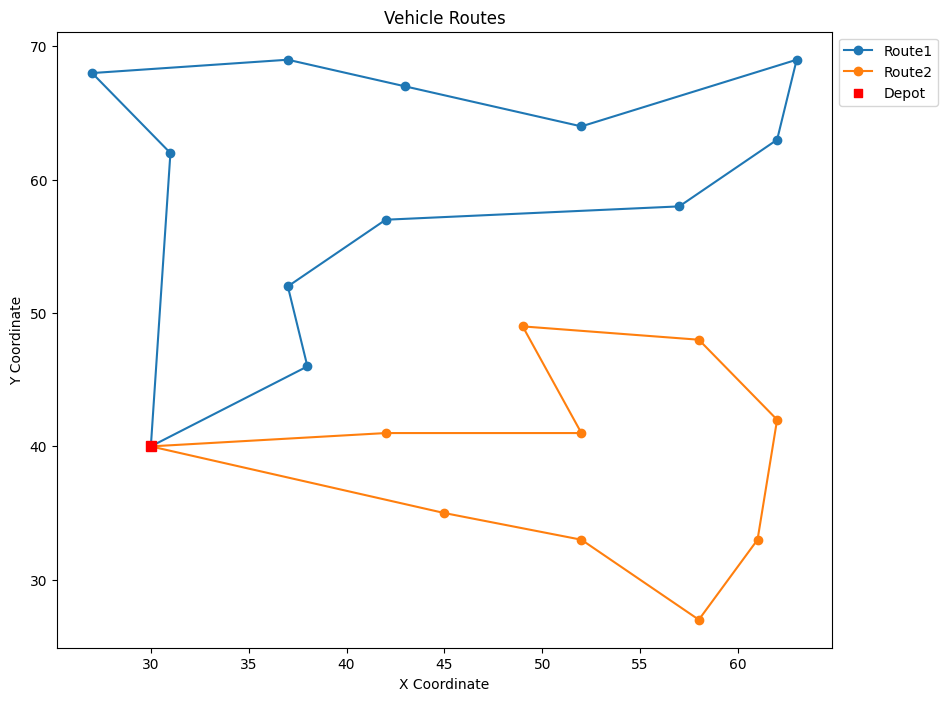

In [12]:
import gurobipy as gp
from gurobipy import GRB
import time

# Creazione del modello
m = gp.Model("CVRP")

####################### VARIABILI ##############################################
x = m.addVars(n, n, vtype=GRB.BINARY, name="x")
u = m.addVars(n, vtype=GRB.CONTINUOUS, name="u")

####################### FUNZIONE OBIETTIVO #####################################

# Funzione obiettivo: minimizzare la distanza totale
m.setObjective(gp.quicksum(distance_matrix[i, j] * x[i, j]
                  for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

######################## VINCOLI ###############################################

# Se un veicolo entra nel i, deve anche uscirne
m.addConstrs(gp.quicksum(x[i, j] for j in range(n)) ==
             gp.quicksum(x[j, i] for j in range(n)) for i in range(n))

# Dal deposito devono uscire k veicoli
m.addConstr(gp.quicksum(x[0, j] for j in range(1,n)) == k)

# Ogni cliente deve essere servito da un unico camion
m.addConstrs(gp.quicksum(x[i, j] for j in range(n) if j != i) == 1
                                              for i in range(1,n))

# Quando il camion parte dal deposito non ha ancora servito alcuna domanda
m.addConstr(u[0] == 0)

# Quando il camion arriva al cliente i, la domanda totale servita deve essere
#minore della sua capacità
m.addConstrs(u[i] <= Q for i in range(n))

#vincoli sulla capacità dei veicoli
#(sostituiscono anche i vincoli di assenza di subtour)
m.addConstrs(u[j] - u[i] >= demands[j] * x[i,j] - Q * (1 - x[i, j])
              for i in range(n) for j in range(n) if i != j if j != 0)

################################################################################

# Ottimizzazione
# Misurazione del tempo di esecuzione di Gurobi
m.Params.TimeLimit = 30
start = time.time()
m.optimize()
end = time.time()

# Output dei risultati
if m.status == GRB.OPTIMAL:
    solution = m.getAttr('x', x)
    routes = {}

    visited = [False] * n  # Tenere traccia dei clienti visitati

    for s in range(k):
        route = [0]
        next_customer = -1

        while True:
            found_next = False
            for j in range(1, n):  # Ignorare il deposito
                if solution[route[-1], j] > 0.5 and not visited[j]:
                    next_customer = j
                    route.append(next_customer)
                    visited[j] = True
                    found_next = True
                    break

            if not found_next:
                break

        route.append(0)  # Assicurarsi che il percorso termini al deposito
        routes[s + 1] = route

    print_results(routes, coordinates)
else:
    print("Nessuna soluzione ottimale trovata")